<a href="https://colab.research.google.com/github/gorzanskik-ai/statistics/blob/main/04_confidence_interval/02_confidence_interval_level_t_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [ ]:
population = stats.norm.rvs(size=100000, loc=45, scale=5) #loc - mean
population_mean = population.mean()
population_std = population.std()

In [ ]:
probe_size = 30
probe = np.random.choice(population, probe_size)
probe_mean = probe.mean()
probe_std = probe.std()

Normal distribution

In [ ]:
z_critical = stats.norm.ppf(q=0.975)
margin_of_error = z_critical * (population_std/math.sqrt(probe_size))
confidence_interval = (probe_mean - margin_of_error, probe_mean + margin_of_error)
print(f"Confidence interval Z (basing on one sample): {confidence_interval} (z-critical {z_critical} population stdev {population_std})")

interval = stats.norm.interval(confidence=0.95, loc=probe_mean, scale = population_std / math.sqrt(probe_size))    #gotowa funkcja do obliczania przedziału pewności
print('Z:', interval)

Confidence interval Z (basing on one sample): (43.63822734055608, 47.22675949903114) (z-critical 1.959963984540054 population stdev 5.01417379868524)
Z: (43.63822734055608, 47.22675949903114)


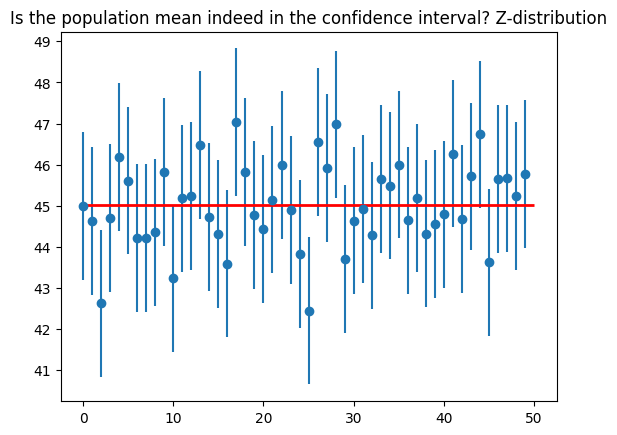

In [ ]:
means = []
intervals =[]

for i in range(50):
    probe = np.random.choice(population, probe_size)
    probe_mean = probe.mean()
    means.append(probe_mean)

    z_critical = stats.norm.ppf(q=0.975)
    margin_of_error = z_critical * (population_std/math.sqrt(probe_size))
    confidence_interval = (probe_mean - margin_of_error, probe_mean + margin_of_error)
    intervals.append(confidence_interval)

plt.figure()
plt.title('Is the population mean indeed in the confidence interval? Z-distribution')
plt.errorbar(x=np.arange(0, 50, 1), y=means, yerr=[(end-begin)/2 for begin,end in intervals], fmt='o')
plt.hlines(xmin=0, xmax=50, y=population_mean, linewidth=2.0, color="red")
plt.show()

T-Student distribution

In [ ]:
t_critical = stats.t.ppf(q=0.975, df=probe_size-1)
margin_of_error = t_critical * (probe_std / math.sqrt(probe_size))
confidence_interval = (probe_mean - margin_of_error, probe_mean + margin_of_error)
print(f"Confidence interval T (basing on one sample): {confidence_interval} (t_critical {t_critical} sample stdev {probe_std})")

interval = stats.t.interval(confidence= 0.95, df= probe_size - 1, loc = probe_mean, scale = probe_std / math.sqrt(probe_size))
print('T:', interval)

Confidence interval T (basing on one sample): (44.04926656739964, 47.50908493593164) (t_critical 2.045229642132703 sample stdev 4.632781880032856)
T: (44.04926656739964, 47.50908493593164)


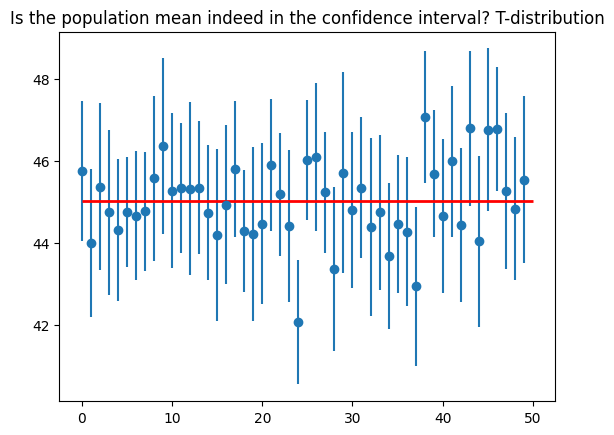

In [ ]:
means = []
intervals =[]

for i in range(50):
    probe = np.random.choice(population, probe_size)
    probe_mean = probe.mean()
    probe_std = probe.std()
    means.append(probe_mean)

    t_critical = stats.t.ppf(q=0.975, df=probe_size-1)
    margin_of_error = t_critical * (probe_std/math.sqrt(probe_size))
    confidence_interval = (probe_mean - margin_of_error, probe_mean + margin_of_error)
    intervals.append(confidence_interval)

plt.figure()
plt.title('Is the population mean indeed in the confidence interval? T-distribution')
plt.errorbar(x=np.arange(0, 50, 1), y=means, yerr=[(end-begin)/2 for begin,end in intervals], fmt='o')
plt.hlines(xmin=0, xmax=50, y=population_mean, linewidth=2.0, color="red")
plt.show()